In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [11]:
data=pd.read_csv("Mall_Customers.csv")

In [12]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Exploratory Data Analysis

<Axes: >

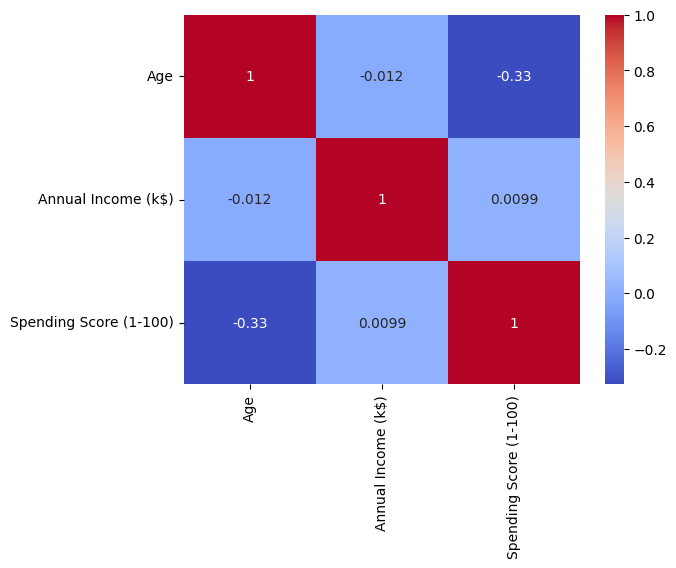

In [16]:
#Correlation matrix
sns.heatmap(data[['Age','Annual Income (k$)','Spending Score (1-100)']].corr(),annot=True, cmap="coolwarm")

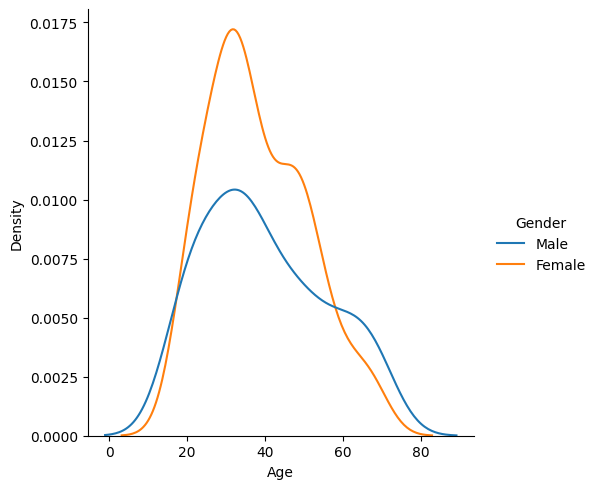

In [21]:
sns.displot(data, x='Age', hue='Gender',kind='kde')

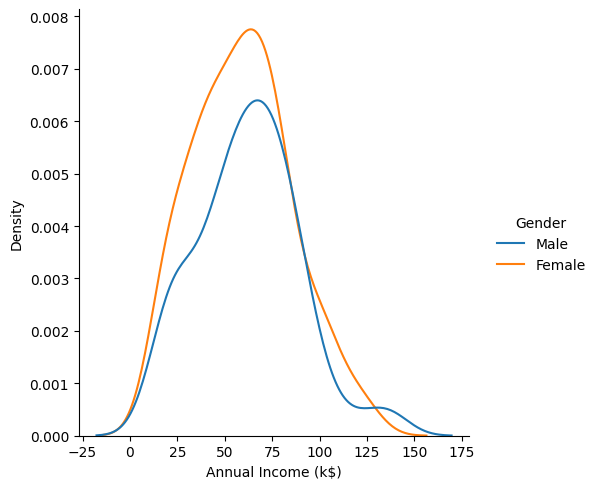

In [23]:
sns.displot(data, x='Annual Income (k$)', hue='Gender',kind='kde')

## Pre-Processing

In [24]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [25]:
data.duplicated().sum()

0

In [28]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [38]:
numeric_features=['Age', 'Annual Income (k$)','Spending Score (1-100)']

In [39]:
scaler=StandardScaler()
data[numeric_features]=scaler.fit_transform(data[numeric_features])

In [40]:
encoder=LabelEncoder()
data['Gender']=encoder.fit_transform(data['Gender'])

In [42]:
clustering_data=data.drop(columns='CustomerID')

## To find optimal number of clusters

In [45]:
#wcss - within cluster ss
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(clustering_data)
    wcss.append(kmeans.inertia_)

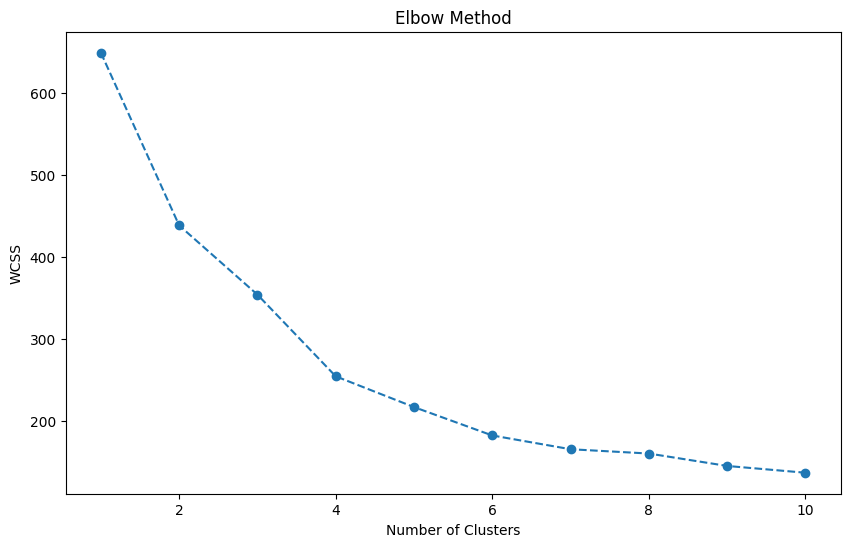

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [58]:
kmeans=KMeans(n_clusters=5)

In [59]:
kmeans.fit(clustering_data)

KMeans(n_clusters=5)

In [60]:
labels=kmeans.labels_

In [61]:
data['Cluster']=labels

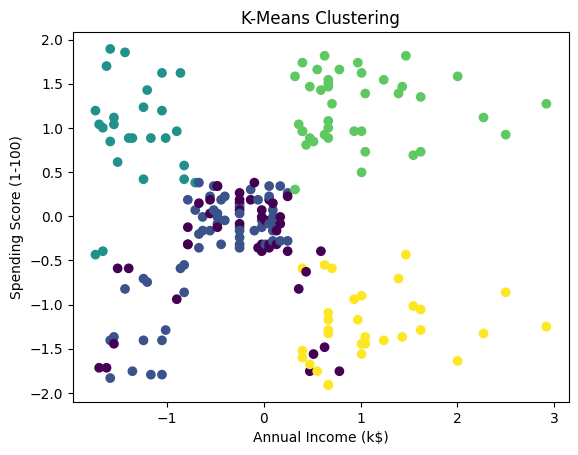

In [62]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.show()